### Импорт библиотек

In [116]:
import pandas as pd
from google.colab import files 

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

### Загрузка данных


In [117]:
df = pd.read_csv('/content/cars.csv')

In [123]:
df.describe()

,Year,Distance,Engine_capacity(cm3),Price
count,33262.000000,3.326200e+04,33262.000000,3.326200e+04
mean,2008.041399,5.266996e+05,1866.127803,9.777433e+03
std,7.895319,4.841939e+06,610.426162,5.579060e+04
min,1900.000000,0.000000e+00,200.000000,2.000000e+02
25%,2004.000000,1.228808e+05,1500.000000,3.500000e+03
50%,2009.000000,1.800000e+05,1800.000000,6.600000e+03
75%,2014.000000,2.400000e+05,2000.000000,1.200000e+04
max,2021.000000,1.000000e+08,5000.000000,1.000000e+07


### Подготовка данных. Очистка выбросов

In [124]:
# удаление дубликатов
df = df.drop_duplicates()

# меняем индексы строк и удаляем старые
df = df.reset_index(drop=True)

df_base = df.copy()
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price
0,Toyota,Prius,2011.0,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014.0,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Renault,Laguna,2012.0,Universal,110000.0,1500.0,Diesel,Manual,6550.0
3,Opel,Astra,2006.0,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
4,Mercedes,Vito,2000.0,Microvan,300000.0,2200.0,Diesel,Manual,3490.0
...,...,...,...,...,...,...,...,...,...
33259,Volkswagen,Passat,2016.0,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0
33260,Land Rover,Freelander,2002.0,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
33261,Dacia,Logan Mcv,2015.0,Universal,89000.0,1500.0,Diesel,Manual,7000.0
33262,Mazda,6,2006.0,Combi,370000.0,2000.0,Diesel,Manual,4000.0


In [119]:
# очистка по пробегу
question_dist = df[(df.Year < 2021) & (df.Distance < 1100)]
df = df.drop(question_dist.index)

# слишком маленькие значения двигателя
question_engine = df[df["Engine_capacity(cm3)"] < 200]
df = df.drop(question_engine.index)

# слишком большие значения двигателя
question_engine = df[df["Engine_capacity(cm3)"] > 5000]
df = df.drop(question_engine.index)

# слишком малые цены
question_price = df[(df["Price"] < 101)]
df = df.drop(question_price.index)

### *Задание 1.* **Визуализация данных с использованием библиотеки Pandas**

In [120]:
# у нас есть два вида данных
cat_columns = [] # категориальные
num_columns = [] # и числовые данные

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns += [column_name]
    else:
        num_columns += [column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
 Число столблцов =  5
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price'] 
 Число столблцов =  4


**Гистограммы для числовых признаков**

строим гистограммы для числовых признаков (показано количество штук определенной категории к признаку обозначенному под осью)

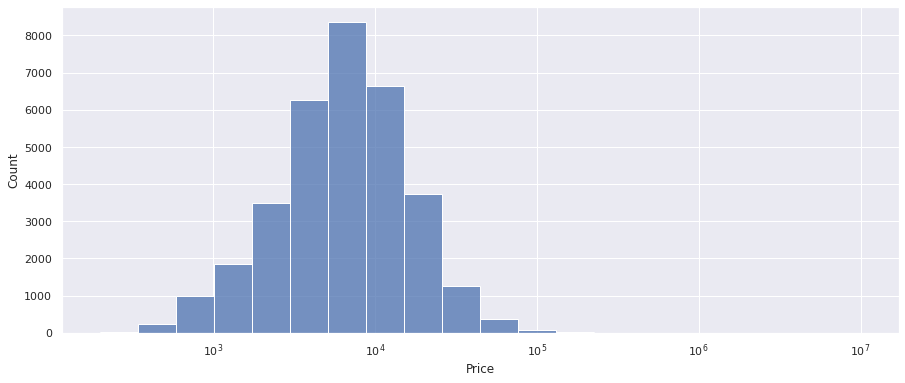

In [128]:
plt.figure(figsize=(15,6))
sns.histplot(data=df,
        x='Price', bins = 20, log_scale = True);

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: ignored

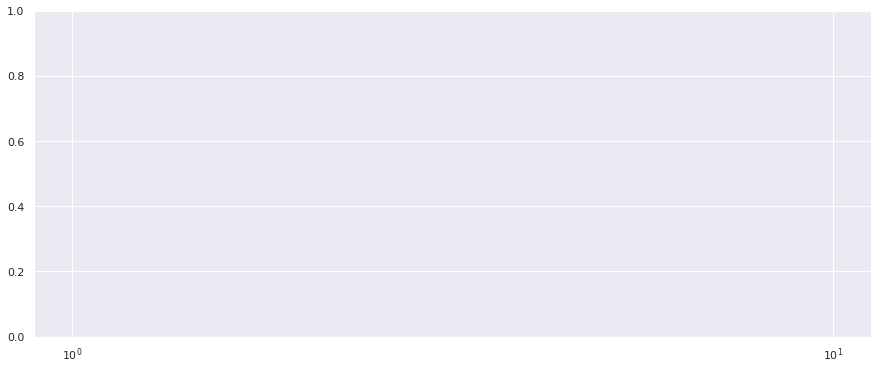

In [134]:
plt.figure(figsize=(15,6))
sns.histplot(data=df,x='Distance', bins = 20, log_scale = True);

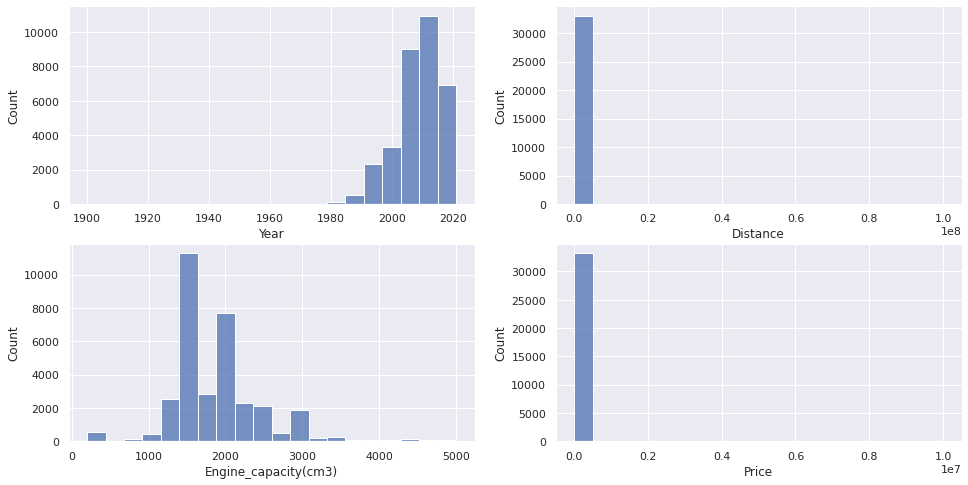

In [129]:
width = 2 # с двоечкой выглядит наиболее
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20);

<Figure size 1080x1080 with 0 Axes>

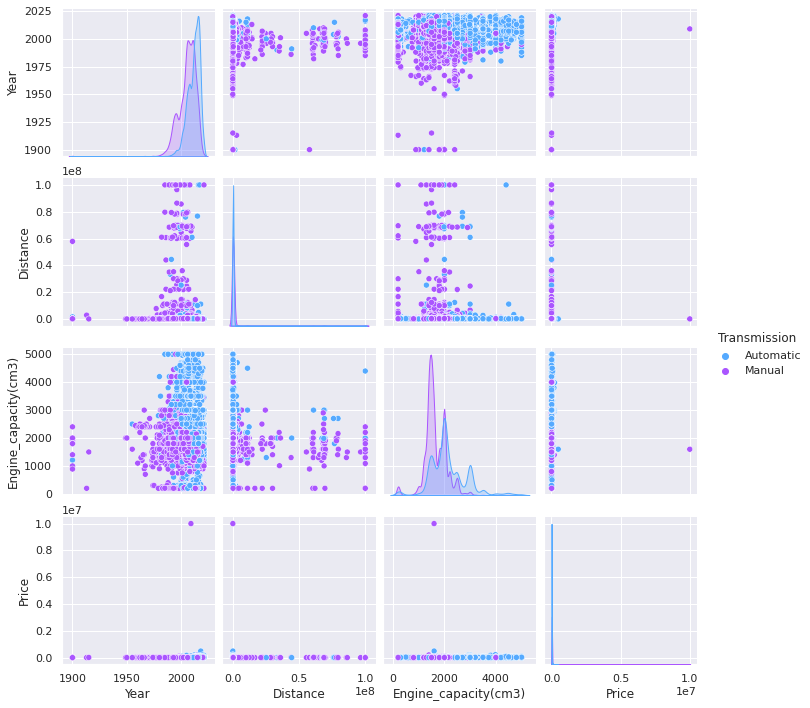

In [122]:
fig = plt.figure(figsize=(15,15)) # точечные графики для трансмиссии
sns.pairplot(data = df, hue ='Transmission', palette = 'cool',);

**Три "новых" визуализации**

<Figure size 1440x1008 with 0 Axes>

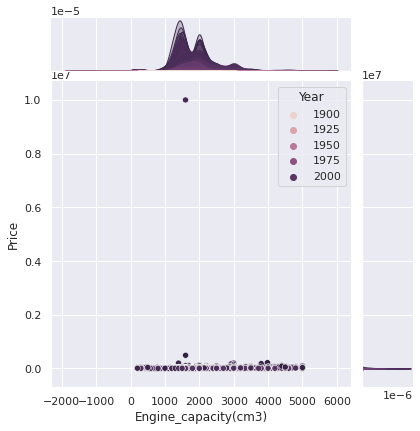

In [74]:
plt.figure(figsize=(10,7)) # Есть ли зависимость между возможностью двигателя и ценой? Мы узнаем это в этом графике
sns.jointplot(data=df, x="Engine_capacity(cm3)", y="Price", hue="Year")

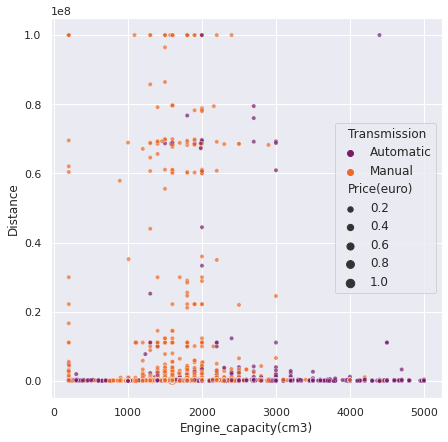

In [31]:
plt.figure(figsize=(7,7)) # А может между возможностями двигателя и расстоянием пройденным автомобилем? (цвета ада)
sns.scatterplot(data=df, x="Engine_capacity(cm3)", y="Distance", hue="Transmission", size = "Price", alpha = 0.7, palette='inferno');

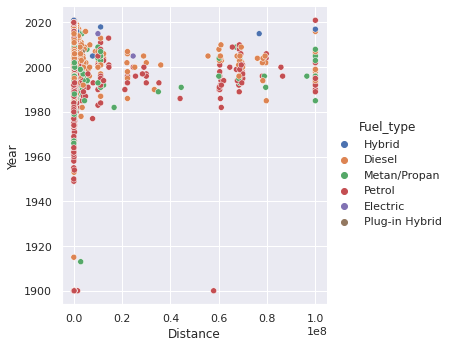

In [38]:
sns.relplot(data=df, x="Distance", y="Year", hue="Fuel_type") # точечный график с расстоянием 

### Задание 2. Добавить в модель дополнительные признаки на основе имеющихся

Ввела квантильные категории для столбца удельный пробег за год (km_year)

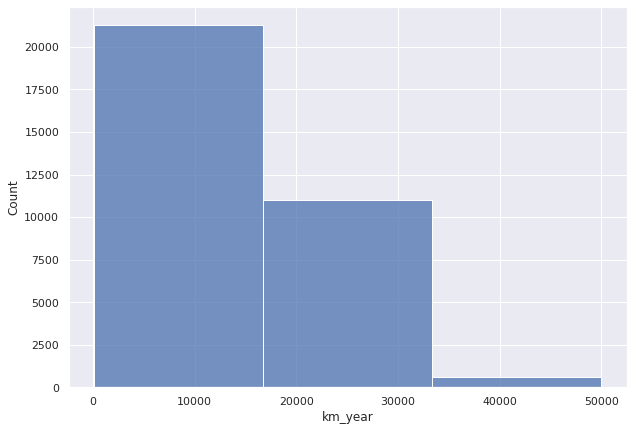

In [96]:
df['Age'] = 2022 - df.Year

df['km_year'] = df.Distance/df.Age
question_km_year = df[df.km_year > 50e3]
df = df.drop(question_km_year.index)
question_km_year = df[df.km_year < 100]
df = df.drop(question_km_year.index)
df = df.reset_index(drop=True)

plt.figure(figsize=(10,7))
sns.histplot(data=df,
            x='km_year',bins = 3); # Автомобилей «с небольшим пробегом» оказалось больше, чем «со средним пробегом» и «с большим пробегом»

**«Умная» замена на редкие категории**

(я пыталась сделать, но попытки безуспешны. моего опыта не хватает, чтобы додуматься)

In [97]:
df.sort_values(by = 'Price').tail(5)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price,Age,km_year
25799,Mercedes,G Class,2020.0,SUV,3000.0,3982.0,Petrol,Automatic,215000.0,2.0,1500.000000
16067,KIA,Sportage,2018.0,Crossover,46000.0,1600.0,Petrol,Automatic,490000.0,4.0,11500.000000
29760,Brilliance,BS3,2009.0,Sedan,57000.0,1598.0,Petrol,Manual,10000000.0,13.0,4384.615385
9236,"GAZ,""M-20 """"Pobeda"""""",1953,Universal,111111.0,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30774,"GAZ,""M-20 """"Pobeda"""""",1954,Combi,250000.0,200....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Задание 3. Предварительная обработка данных

**НОРМАЛИЗАЦИЯ**

In [111]:
df_norm = df.copy()
num_columns = df_norm.describe().columns

Xmin = df[num_columns].min()
Xmax = df[num_columns].max()

df_norm[num_columns] = (df[num_columns] - Xmin) / (Xmax - Xmin)

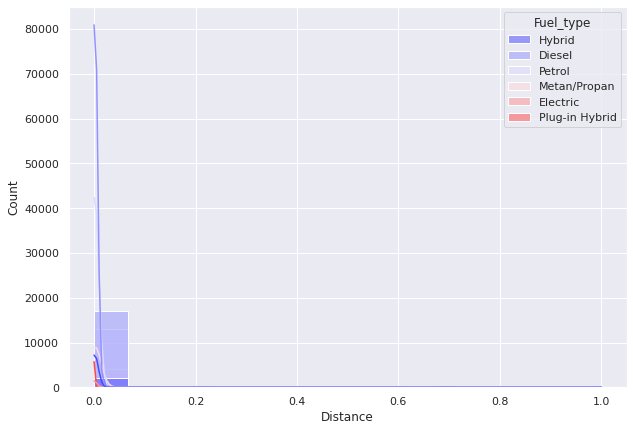

In [113]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = df_norm,
             x = 'Distance',
             hue = 'Fuel_type',
             bins = 15, kde = True,
             palette='bwr')

In [ ]:
df_norm.to_csv('/content/cars_norm.csv',index=False)

**СТАНДАРТИЗАЦИЯ**

In [102]:
DF_scaled = df.copy()
M = df[num_columns].mean()
STD = df[num_columns].std()
DF_scaled[num_columns] = (df[num_columns]-M)/STD

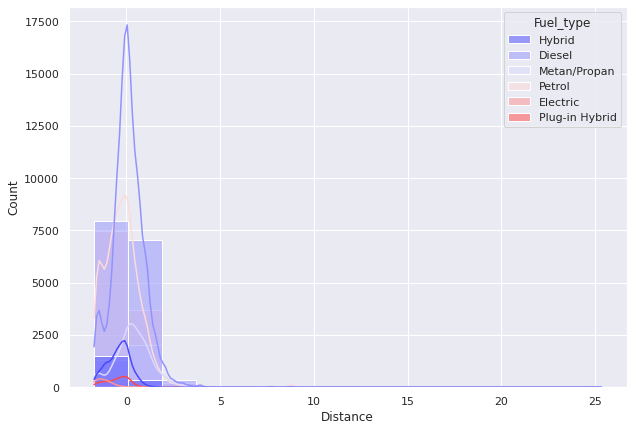

In [103]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = DF_scaled,
             x = 'Distance', 
             hue = 'Fuel_type',
             bins = 15, kde = True,
             palette='bwr')

In [114]:
DF_scaled.to_csv('/content/cars_standart.csv',index=False)

**НЕЛИНЕЙНОЕ ПРЕОБРАЗОВАНИЕ**

In [104]:
DF_power  = df.copy()
DF_power[num_columns] = np.log(DF_power[num_columns])
M = DF_power[num_columns].mean()
STD = DF_power[num_columns].std()
DF_power[num_columns] = (DF_power[num_columns]-M)/STD

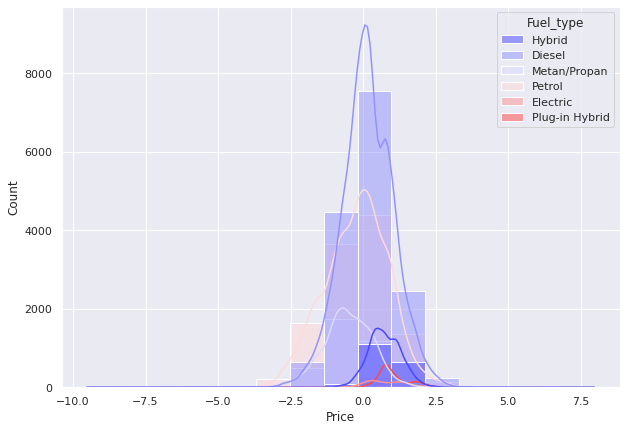

In [105]:
fig = plt.figure(figsize=(10,7))

sns.histplot(data = DF_power, 
             x = 'Price', 
             hue = 'Fuel_type', 
             bins = 15, kde = True,
             palette='bwr')


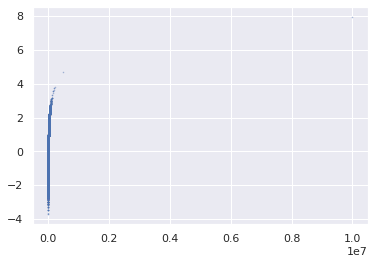

In [87]:
plt.plot(df['Price'], DF_power['Price'], '.', alpha = 0.5, markersize = 1)

In [115]:
DF_power.to_csv('/content/cars_nelin.csv',index=False)